In [1]:
from point import Point
from lattice import Lattice
from simulator import Simulator

from utils import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
lattice = Lattice(0.5, 0.5, 2, 0.5)

100%|██████████| 62/62 [00:00<00:00, 20678.03it/s]


In [24]:
lattice.plot_3d_points_with_na()

In [25]:
simulator = Simulator(lattice)
simulator.show_state()

100%|██████████| 62/62 [00:00<00:00, 20663.24it/s]


In [26]:
simulator = Simulator(lattice)
simulator.step()
simulator.show_state()

100%|██████████| 62/62 [00:00<00:00, 20537.58it/s]


In [27]:
simulator.simulate(3000, 6000)

100%|██████████| 3000/3000 [00:00<00:00, 8330.35it/s]


In [28]:
simulator.show_state()

In [3]:
lattice_big = Lattice(0.5, 0.5, 8, 0.5)

100%|██████████| 4536/4536 [00:12<00:00, 359.75it/s]


In [4]:
simulator_big = Simulator(lattice_big)

100%|██████████| 4536/4536 [00:16<00:00, 271.93it/s]


100%|██████████| 3000/3000 [00:16<00:00, 178.71it/s]


[[1829, 439], [1811, 457], [1830, 438], [1834, 434], [1870, 398], [1845, 423], [1866, 402], [1851, 417], [1856, 412], [1851, 417], [1862, 406], [1852, 416], [1859, 409], [1853, 415], [1840, 428], [1851, 417], [1855, 413], [1837, 431], [1825, 443], [1849, 419], [1840, 428], [1847, 421], [1809, 459], [1830, 438], [1817, 451], [1834, 434], [1824, 444], [1842, 426], [1844, 424], [1848, 420]]


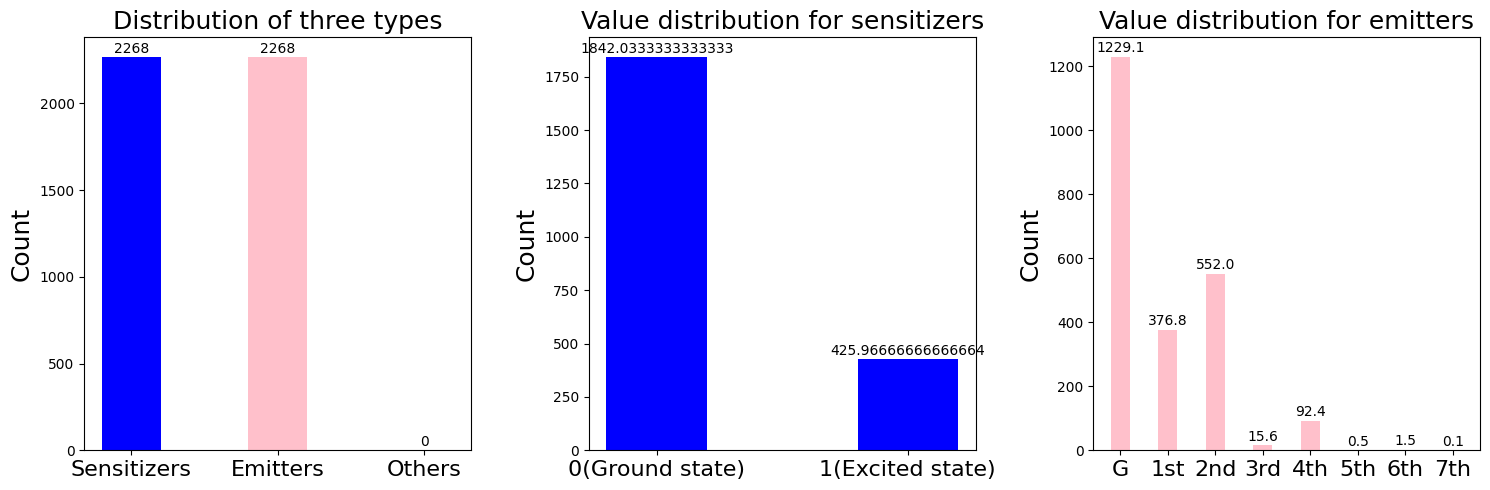

In [5]:
simulator_big.simulate(3000, 6000)

100%|██████████| 1000/1000 [00:10<00:00, 93.83it/s]


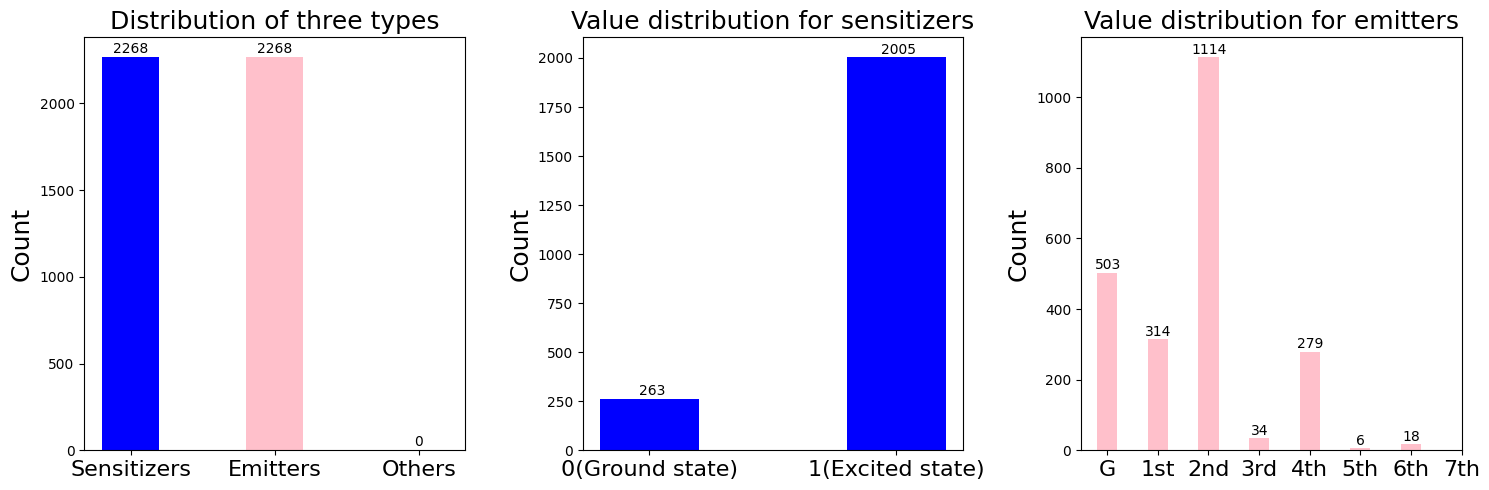

In [ ]:
simulator_big.simulate(1000)
simulator_big.lattice.plot_distributions()

100%|██████████| 500/500 [00:06<00:00, 78.04it/s]


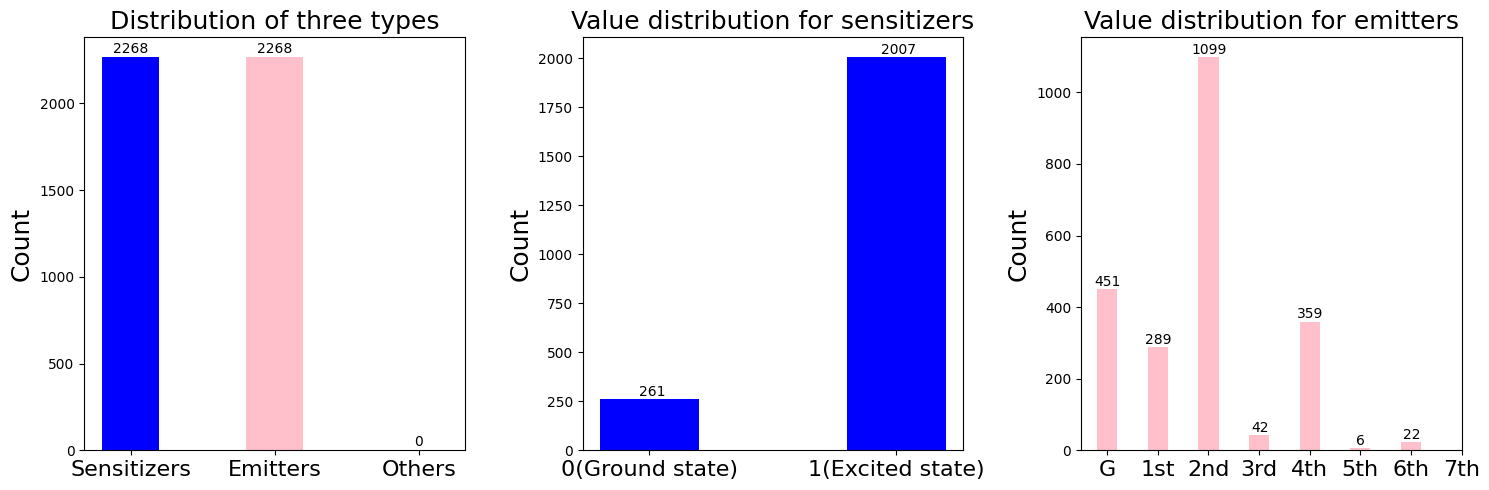

In [ ]:
simulator_big.simulate(500) # 1500
simulator_big.lattice.plot_distributions()

100%|██████████| 500/500 [00:06<00:00, 76.95it/s]


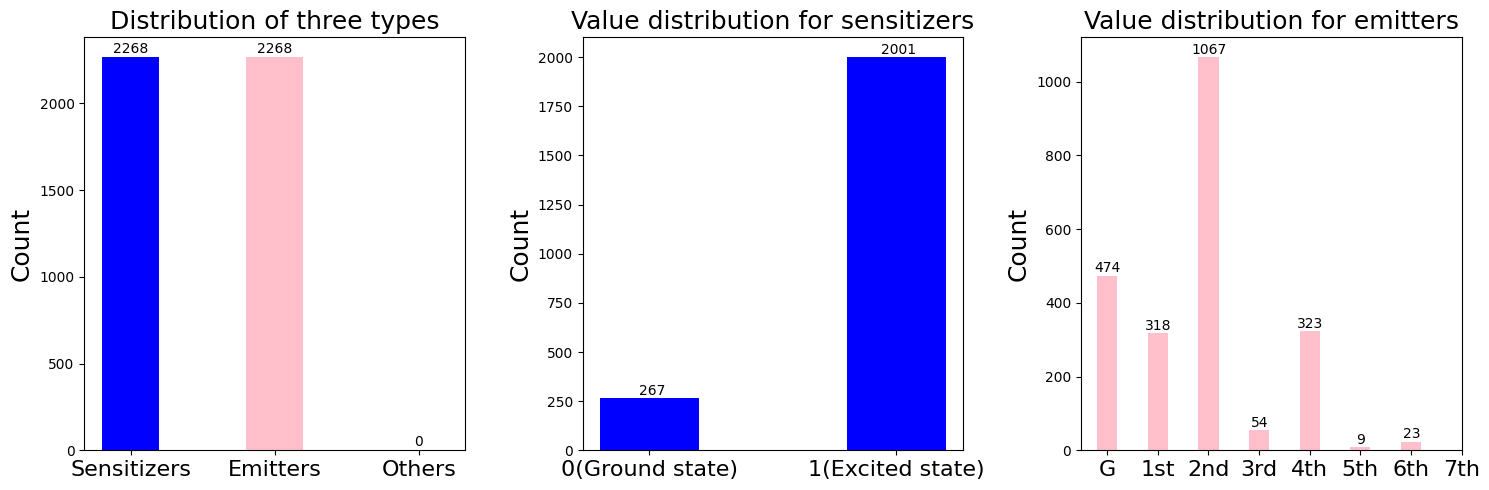

In [ ]:
simulator_big.simulate(500) # 2000
simulator_big.lattice.plot_distributions()

100%|██████████| 500/500 [00:06<00:00, 72.74it/s]


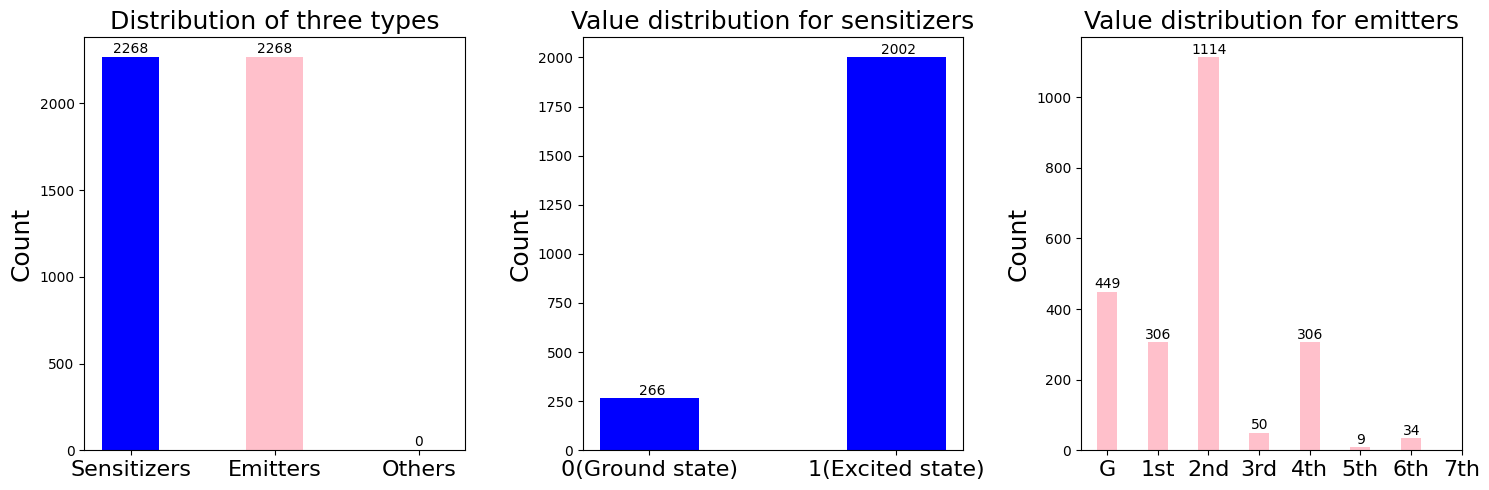

In [ ]:
simulator_big.simulate(500) # 2500
simulator_big.lattice.plot_distributions()

100%|██████████| 500/500 [00:06<00:00, 75.85it/s]


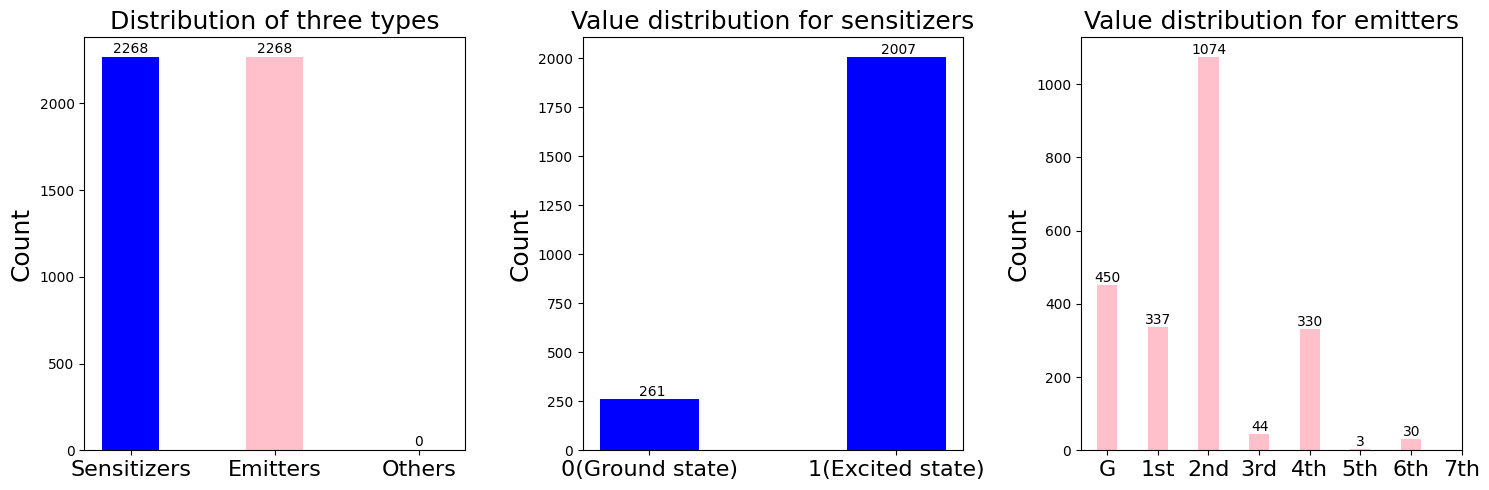

In [ ]:
simulator_big.simulate(500) # 3000
simulator_big.lattice.plot_distributions()

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:06<00:00, 74.00it/s]


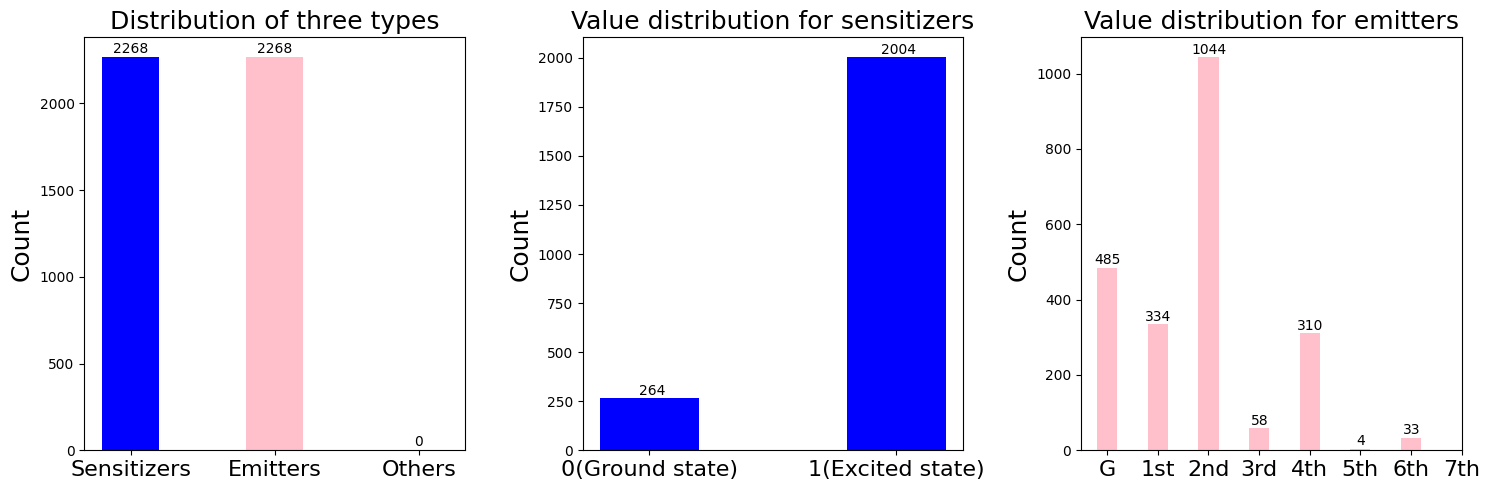

In [ ]:
simulator_big.simulate(500) # 3500
simulator_big.lattice.plot_distributions()

100%|██████████| 500/500 [00:06<00:00, 74.25it/s]


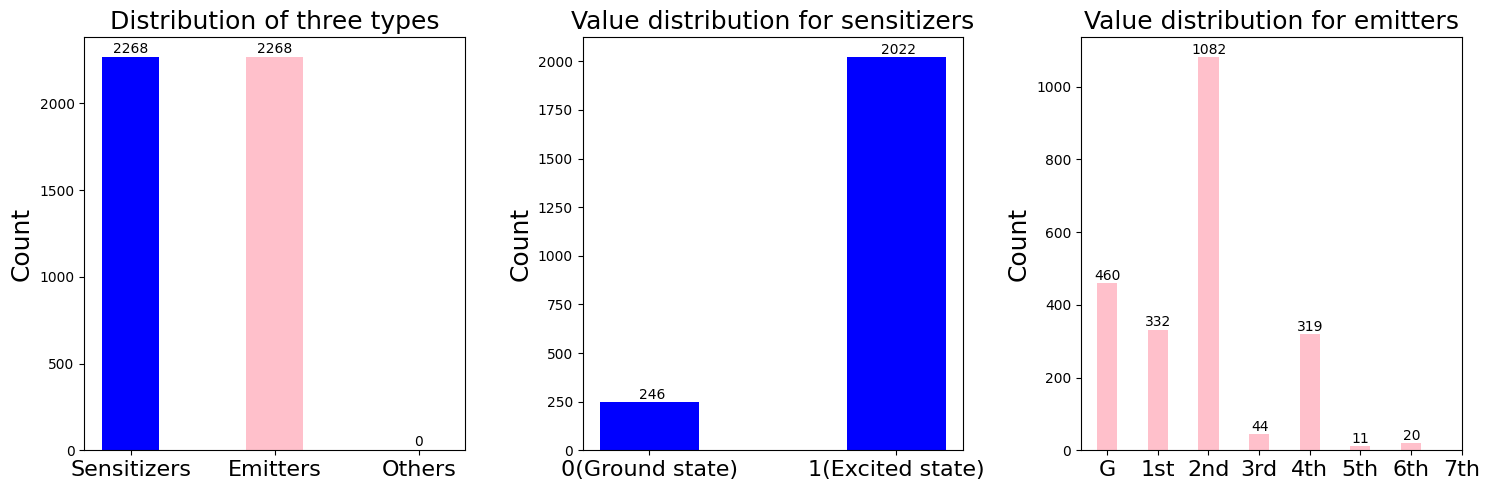

In [ ]:
simulator_big.simulate(500) # 4000
simulator_big.lattice.plot_distributions()

In [ ]:
simulator_big.show_state()

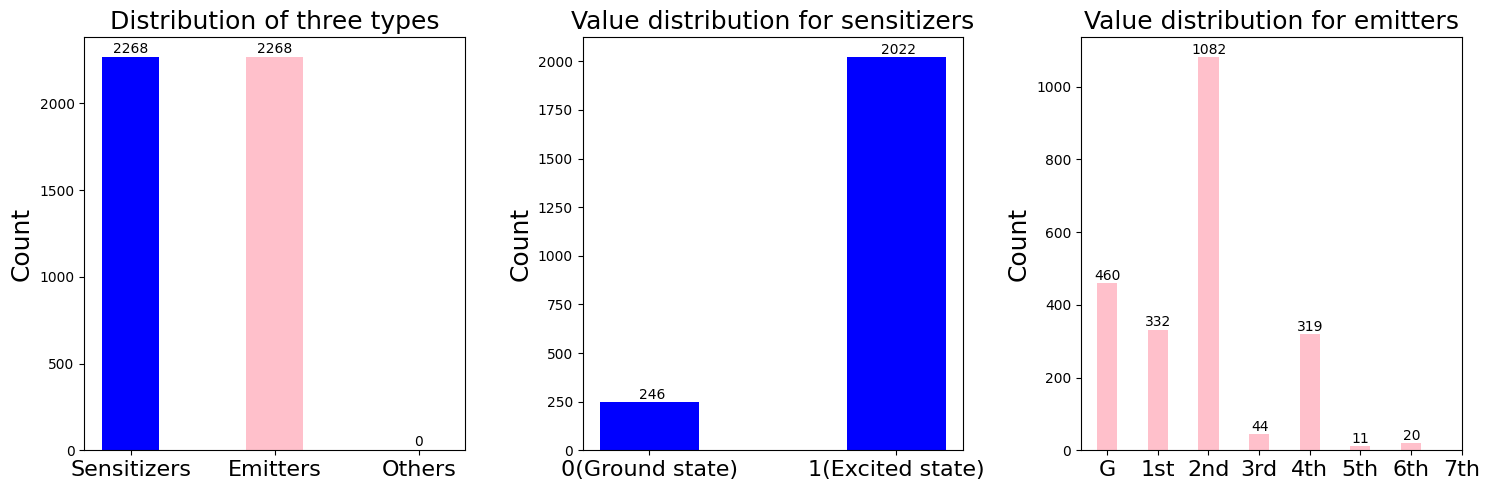

In [ ]:
simulator_big.lattice.plot_distributions()

In [ ]:
simulator_big.lattice.ode_distribution()[1:]

[2.4178210048785487, 13.679074562719187, 15938.014438014337, 13435.12852698528, 2384.148917412857, 6617.155625117925, 578.303185170339, 403.80418633764157, 86.99401232224967]
2268
[2022.          583.18766923  333.59279561  242.85775578  203.31982481
  186.32653351  181.18115969  183.10818802  189.73335279  199.78922175]
[ 0.          1.5107579   3.67811646  5.95236584  8.200787   10.33280062
 12.27627844 13.97418659 15.38411588 16.47831777]


[13.679074562719187,
 15938.014438014337,
 13435.12852698528,
 2384.148917412857,
 6617.155625117925,
 578.303185170339,
 403.80418633764157,
 86.99401232224967]

### Calculate the transition probabilities from reaction rates

We only consider how particle in excited state i leaves state i, we start with 
$$\frac{dN_i}{dt} = -\sum_j w_{ij}N_i - \sum_j k_{ij} N_iN_j$$

 - Use $\Delta t$ instead of $t$, we have $\frac{\Delta N_i}{\Delta t} = -\sum_j w_{ij}N_i - \sum_j k_{ij} N_iN_j$.
 
 Calculate $P_{leave} = - \frac{\Delta N_i}{N_i}$.

 We have $\frac{\Delta N_i}{N_i} = (-\sum_j w_{ij} -\sum_j k_{ij})\Delta t$.

 So $$P_{leave} =  (\sum_j w_{ij} +\sum_j k_{ij})\Delta t$$
 
 - Taylor expansion

 $$N_i(\Delta t) = N_i(0)\cdot e^{-(\sum_j w_{ij} +\sum_j k_{ij})\Delta t}$$
 $$P_{stay} = \frac{N_i(\Delta t)}{N_i(0)} = e^{-(\sum_j w_{ij} +\sum_j k_{ij})\Delta t}$$
 $$P_{leave} = 1-P_{stay} = 1- e^{-(\sum_j w_{ij} +\sum_j k_{ij})\Delta t} \approx (\sum_j w_{ij} +\sum_j k_{ij})\Delta t$$



Assumptions

 - only consider particles leaving state i but not states entering state i
 - $N_j$ will not change in small $\Delta t$
 - ignore 2nd order terms in Taylor expansion
